In [22]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D,BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D 
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from kt_utils import *
import keras.backend as K
K.set_image_data_format('channels_last')
%matplotlib inline

In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

In [3]:
# normalization
X_train = X_train_orig/255.
X_test = X_test_orig/255.

In [4]:
# reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

In [5]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [12]:
def HappyModel(input_shape):
    X_input = Input(input_shape)
    X = ZeroPadding2D((3,3))(X_input)
    X = Conv2D(16, (5,5), strides = (1,1), name = 'conv0')(X)
    X = BatchNormalization(axis =3, name='bn0')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2), name='max_pool')(X)
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)
    model = Model(inputs=X_input, outputs=X, name = 'HappyModel')
    return model

In [13]:
happyModel = HappyModel(X_train.shape[1:])

In [14]:
happyModel.compile('adam','binary_crossentropy',metrics=['accuracy'])


In [15]:
happyModel.fit(X_train, Y_train, epochs=12, batch_size = 50)

Epoch 1/12
600/600 [==============================] - 2s 3ms/step - loss: 1.0685 - acc: 0.5917
Epoch 2/12
600/600 [==============================] - 1s 2ms/step - loss: 0.3711 - acc: 0.8333
Epoch 3/12
600/600 [==============================] - 1s 2ms/step - loss: 0.2398 - acc: 0.9133
Epoch 4/12
600/600 [==============================] - 1s 2ms/step - loss: 0.1729 - acc: 0.9350
Epoch 5/12
600/600 [==============================] - 1s 2ms/step - loss: 0.1332 - acc: 0.9550
Epoch 6/12
600/600 [==============================] - 1s 2ms/step - loss: 0.1158 - acc: 0.9700
Epoch 7/12
600/600 [==============================] - 1s 2ms/step - loss: 0.1076 - acc: 0.9767
Epoch 8/12
600/600 [==============================] - 1s 2ms/step - loss: 0.1035 - acc: 0.9717
Epoch 9/12
600/600 [==============================] - 1s 2ms/step - loss: 0.0803 - acc: 0.9833
Epoch 10/12
600/600 [==============================] - 1s 2ms/step - loss: 0.0709 - acc: 0.9867
Epoch 11/12
600/600 [============================

In [16]:
preds = happyModel.evaluate(X_test, Y_test, batch_size=32,verbose=1,sample_weight=None)

print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

150/150 [==============================] - 0s 1ms/step

Loss = 0.157696670293808
Test Accuracy = 0.9400000015894572


In [17]:
### START CODE HERE ###
img_path = 'images/my_image.jpg'
### END CODE HERE ###
img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(happyModel.predict(x))

FileNotFoundError: [Errno 2] No such file or directory: 'images/my_image.jpg'

In [18]:
happyModel.summary()

Model: "HappyModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 66, 66, 16)        1216      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 66, 66, 16)        64        
_________________________________________________________________
activation_2 (Activation)    (None, 66, 66, 16)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 33, 33, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 17424)             0

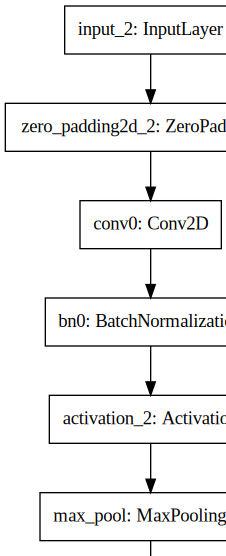

In [21]:
plot_model(happyModel, to_file='HappyModel.png')
SVG(model_to_dot(happyModel).create(prog='dot', format='svg'))